In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
df = pd.read_csv("/content/Linear Regression/dataset/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


##EDA

#Step 1. Get Basic Info Around The Dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [17]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [18]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [19]:
df.duplicated().sum()

np.int64(0)

#Step 2: Target Variable Analysis (Weight)

Text(0.5, 1.0, 'Distribution of Fish Weights')

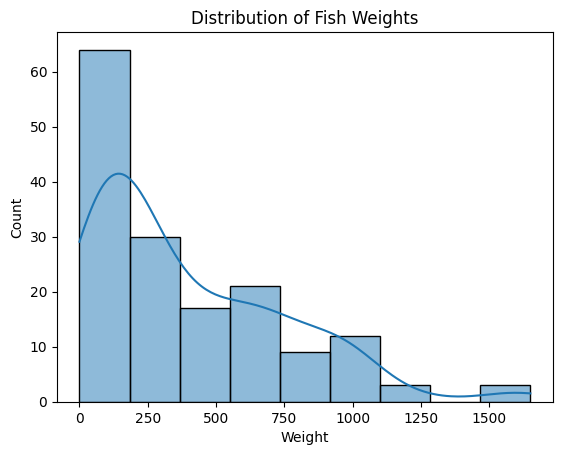

In [20]:
sns.histplot(df['Weight'], kde=True)
plt.title("Distribution of Fish Weights")

Check for Outliers

Text(0.5, 1.0, 'Boxplot of Fish Weights')

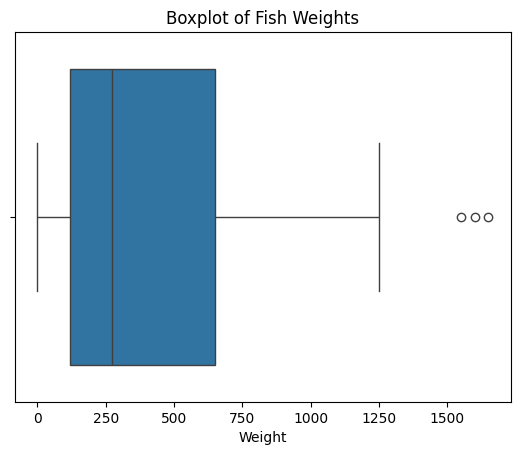

In [21]:
sns.boxplot(x=df['Weight'])
plt.title("Boxplot of Fish Weights")

#Step 3: Feature Distribution

array([[<Axes: title={'center': 'Length1'}>,
        <Axes: title={'center': 'Length2'}>],
       [<Axes: title={'center': 'Length3'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Width'}>, <Axes: >]], dtype=object)

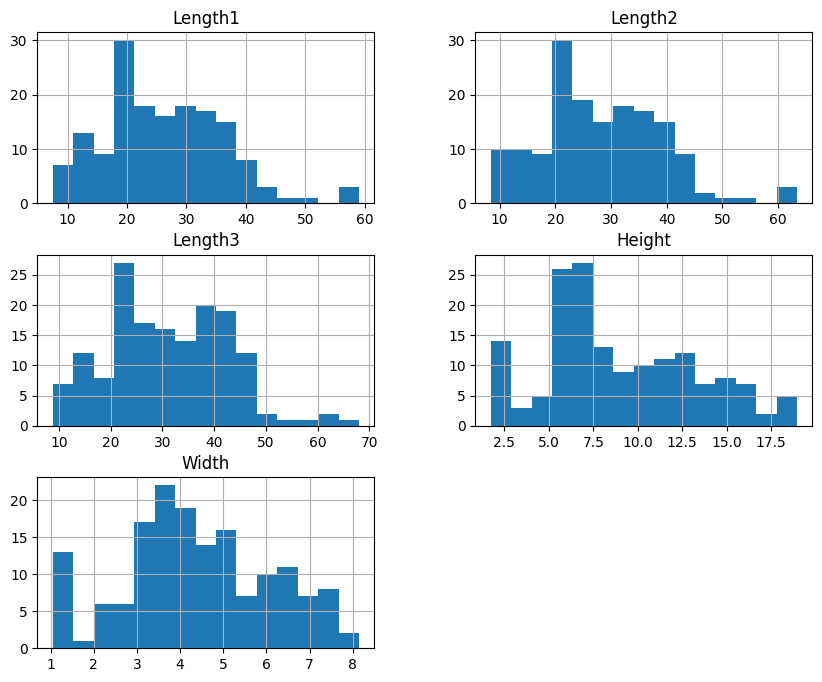

In [22]:
numerical_cols = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
df[numerical_cols].hist(figsize=(10, 8), bins=15)

#Step 4: Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

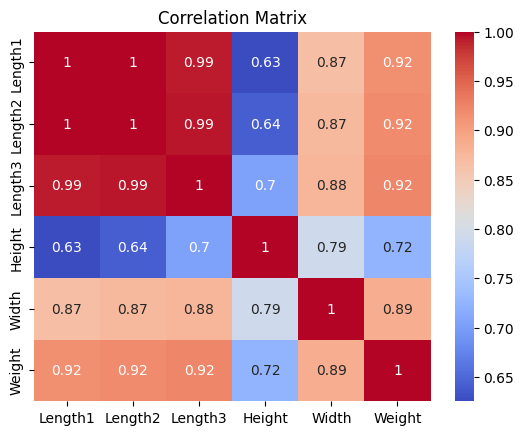

In [23]:
sns.heatmap(df[numerical_cols + ['Weight']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

PAIR PLOT FOR CO-RELATION

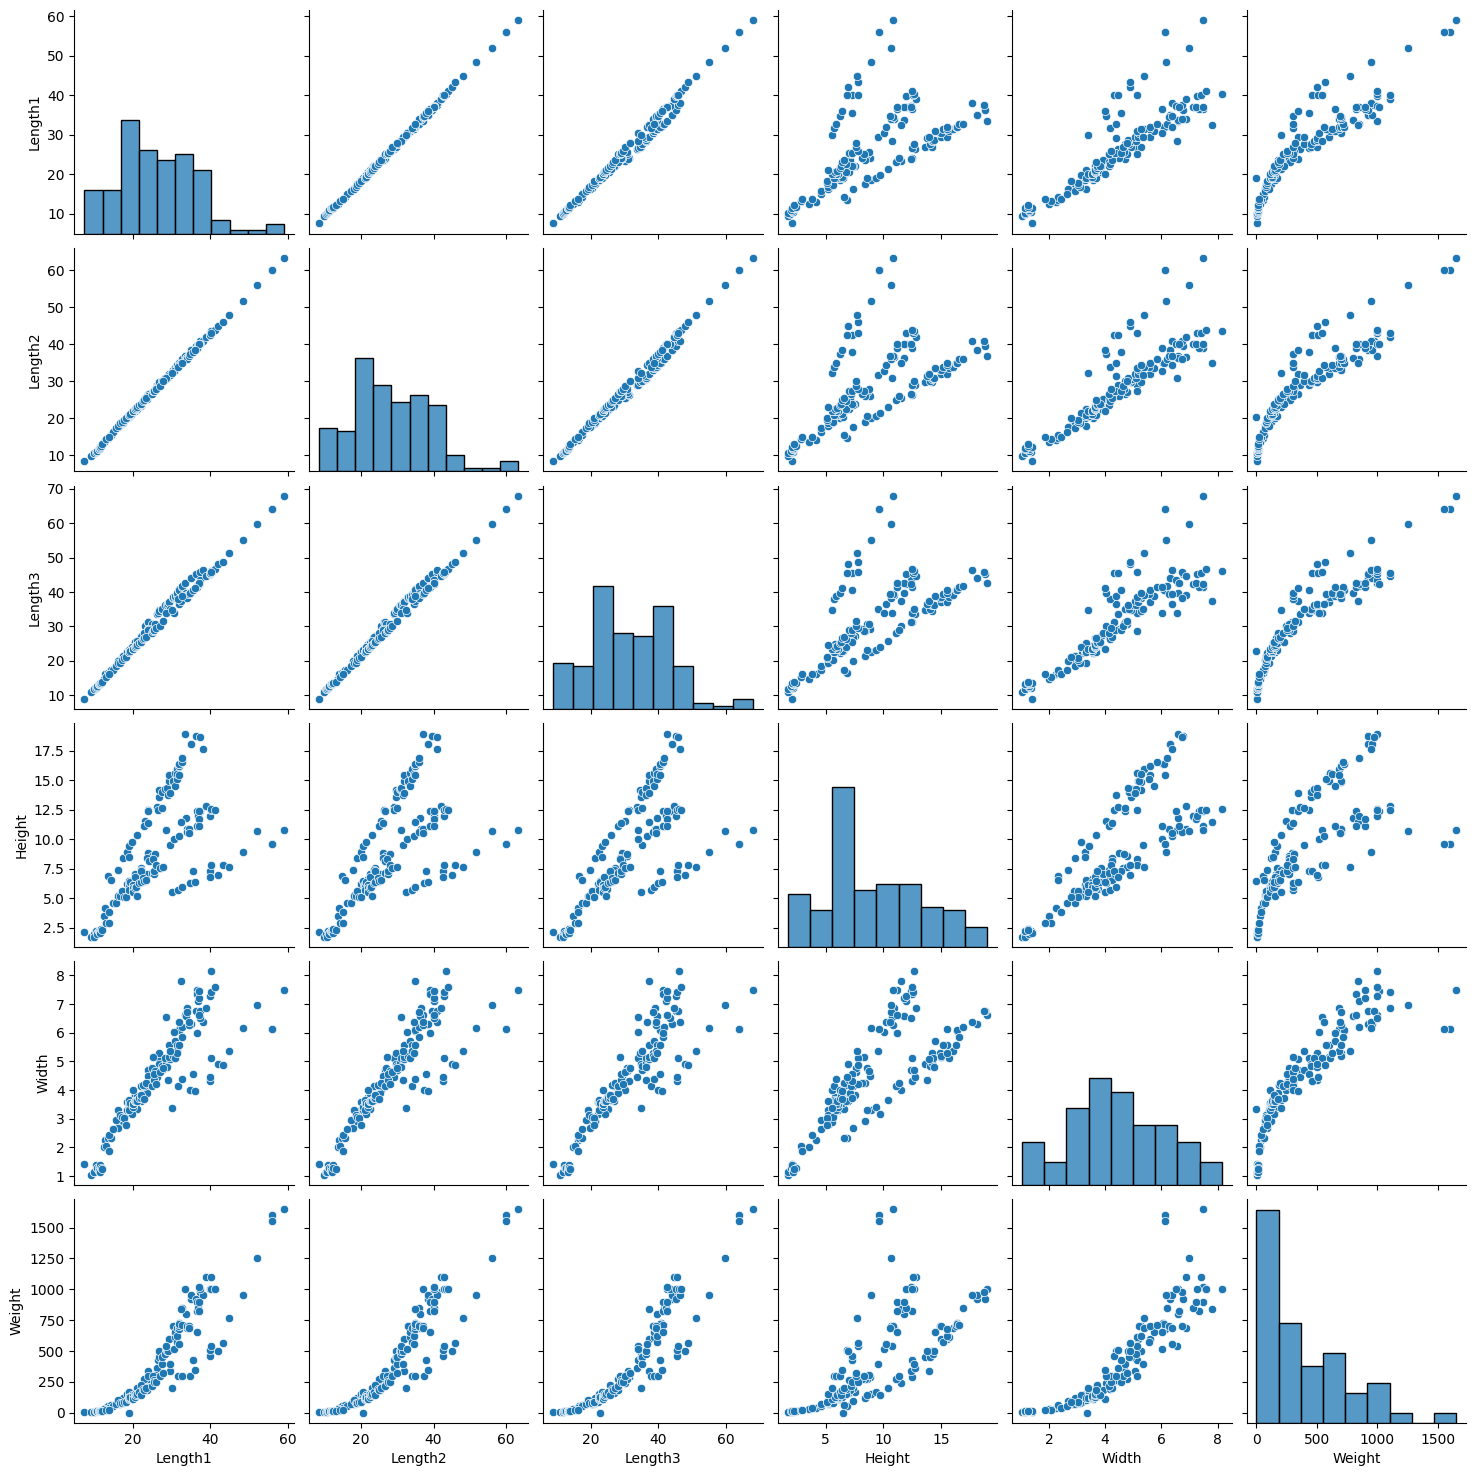

In [24]:
sns.pairplot(df[numerical_cols + ['Weight']])

#Step 6: Outlier Detection

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Length1'),
  Text(1, 0, 'Length2'),
  Text(2, 0, 'Length3'),
  Text(3, 0, 'Height'),
  Text(4, 0, 'Width'),
  Text(5, 0, 'Weight')])

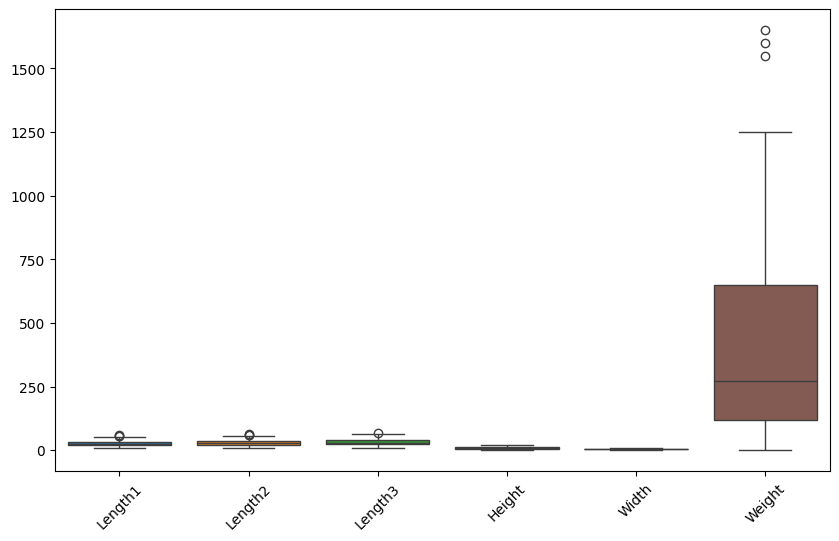

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols + ['Weight']])
plt.xticks(rotation=45)

#Step 7: Target vs Features Plot

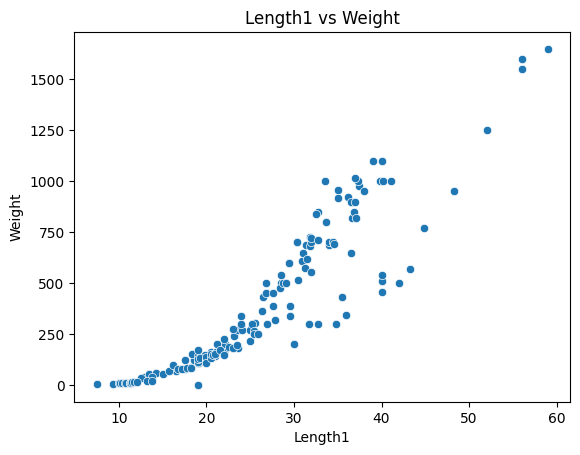

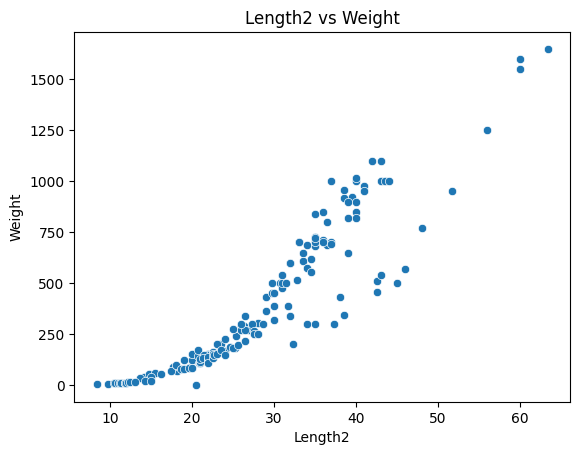

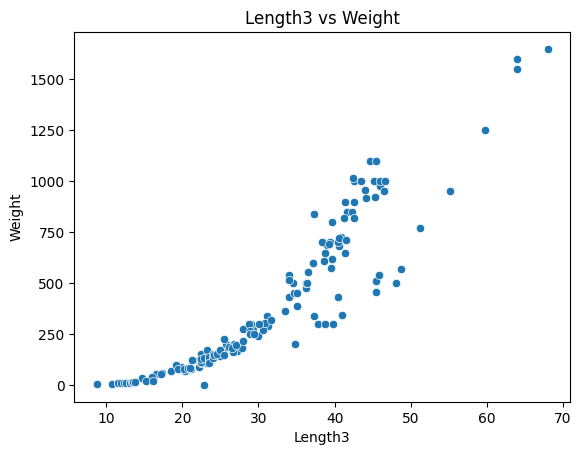

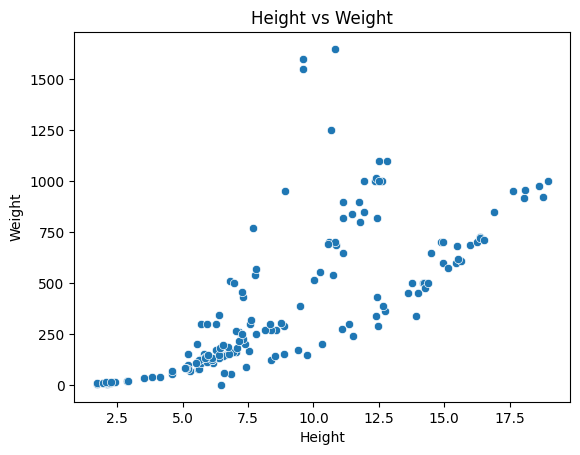

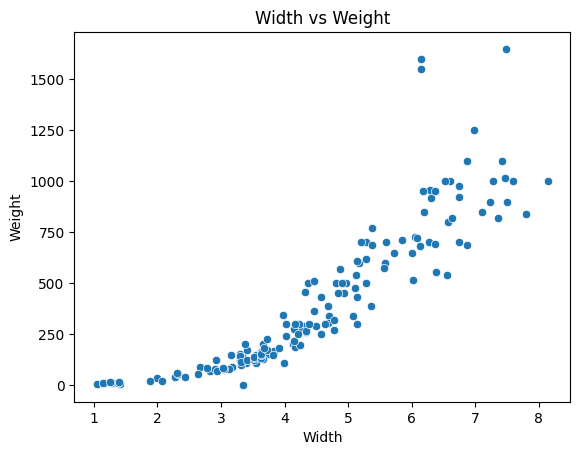

In [26]:
for col in numerical_cols:
    sns.scatterplot(data=df, x=col, y='Weight')
    plt.title(f"{col} vs Weight")
    plt.show()

#Step 8: Categorical Column - Species

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Bream'),
  Text(1, 0, 'Roach'),
  Text(2, 0, 'Whitefish'),
  Text(3, 0, 'Parkki'),
  Text(4, 0, 'Perch'),
  Text(5, 0, 'Pike'),
  Text(6, 0, 'Smelt')])

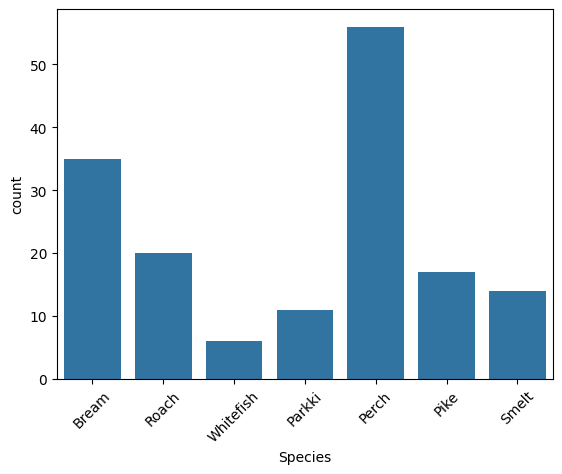

In [27]:
sns.countplot(x='Species', data=df)
plt.xticks(rotation=45)

#Step 9 : boxplot of Weight by Species

/tmp/ipython-input-28-3222877889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Species', y='Weight', palette='Set2')


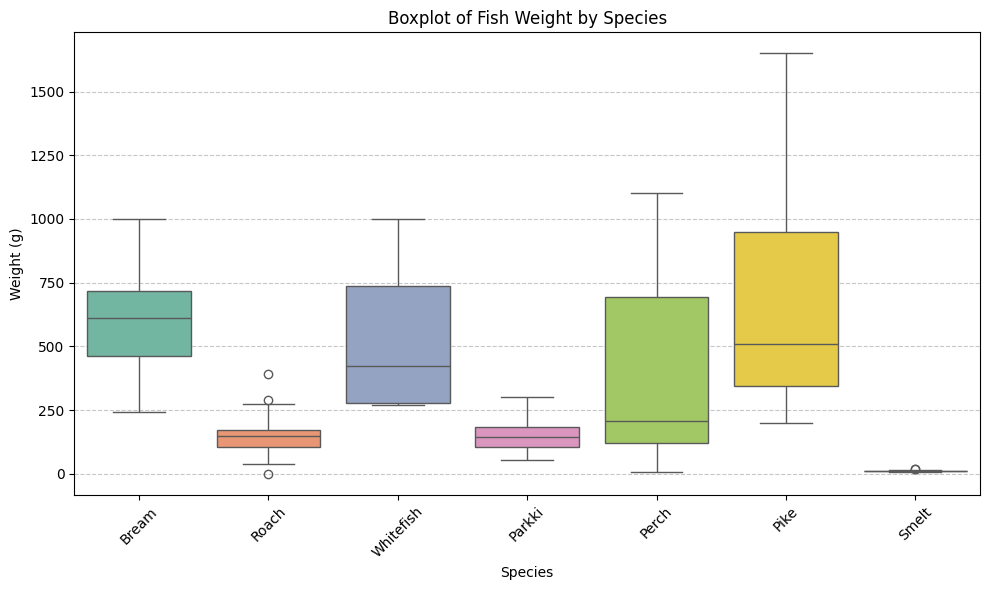

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Species', y='Weight', palette='Set2')

plt.title('Boxplot of Fish Weight by Species')
plt.ylabel('Weight (g)')
plt.xlabel('Species')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#📊 EDA Summary: Fish Weight Prediction

    📁 Dataset Overview:
    The dataset includes features: Length1, Length2, Length3, Height, Width, and Weight (target).

    Goal: Predict Weight of a fish based on physical dimensions.

    1️. Target Distribution (Weight)
    Skewness: Right-skewed distribution (positively skewed)
    Action: Log transformation suggested (log1p) to normalize it for regression

    2️. Boxplot of Target
    Shows 3 clear outliers above ~1400g
    Interpretation: These could be large fish, not necessarily data errors
    Action: Retain them; apply log-transform to reduce their influence

    3️. Feature Distributions
    All features (Length, Height, Width) are also right-skewed
    Action: Scaling (StandardScaler) is recommended; log-transform not mandatory unless strong skew persists after scaling

    4️. Multivariate Outlier Check (Boxplot)
    Weight again shows major spread and outliers
    Features appear tightly packed and low-variance compared to the target
    Action: No feature outlier removal needed at this stage

    5. Correlation Matrix
    Length1, Length2, Length3 are ~0.99 correlated → strong multicollinearity

    Weight correlates well with:
    Length1/2/3 → ~0.92
    Width → ~0.89
    Height → ~0.72

    Action:
    Drop 2 of the 3 length features or average them
    Possibly drop Height if minimal improvement during training

    6️. Target vs Feature Relationship
    Visual trend: Non-linear relationship (looks quadratic or exponential)
    Linear model might underfit, so try Polynomial Regression (deg=2)

    7. Boxplot of Weight by Species
    Trend : Clear species-wise separation in weight
    Observation : Pike and Bream are heaviest; Smelt is lightest
    Action : Species is a high-impact categorical variable — should be one-hot encoded